In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import torch
import torch.optim as optim
import torchvision

In [52]:
def matrix_factorize(I,r,device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")):
    I = I.to(device)

    # Initialize the W and H matricies
    W = torch.randn(I.shape[0],r,device=device ,requires_grad=True)
    H = torch.randn(r,I.shape[1], device=device ,requires_grad=True)

    # Using gradient descent on W and H
    optimizer = optim.Adam([W, H], lr=0.01)
    mask = ~torch.isnan(I)

    threshold = 0.000001
    loss0 = np.inf
    loss1 = 0
    count = 0

    while abs(loss0 - loss1) > threshold:
        diff_matrix = torch.mm(W,H) - I
        diff_vec = diff_matrix[mask]
        loss = torch.norm(diff_vec)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss0,loss1 = loss1,loss
        if count % 100 == 0:
            print(count,"loss:",loss)
        count+=1

    # for i in range(1500):
    #     # Compute the loss
    #     diff_matrix = torch.mm(W, H) - I
    #     diff_vector = diff_matrix[mask]
    #     loss = torch.norm(diff_vector)
        
    #     # Zero the gradients
    #     optimizer.zero_grad()
        
    #     # Backpropagate
    #     loss.backward()
        
    #     # Update the parameters
    #     optimizer.step()

    #     if i % 100 == 0:
    #         print(i,"loss:",loss)
    
    
    return W,H,loss


In [4]:
# Load image
img = torchvision.io.read_image("Lal_Minar.jpeg")
print(img.shape)

torch.Size([3, 600, 900])


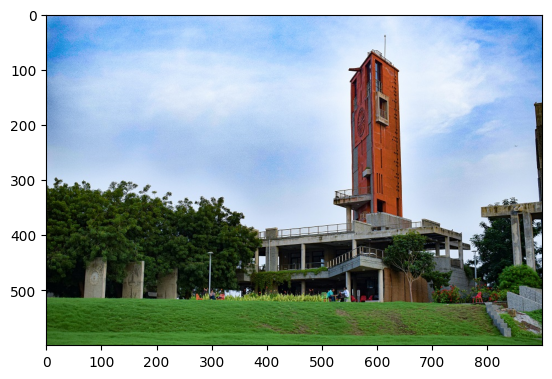

In [5]:
plt.imshow(img.permute(1,2,0))


In [6]:
#Convert image to gray scale
img=img.mean(dim=0,keepdim=False,dtype=torch.float)
print(img.shape)

torch.Size([600, 900])


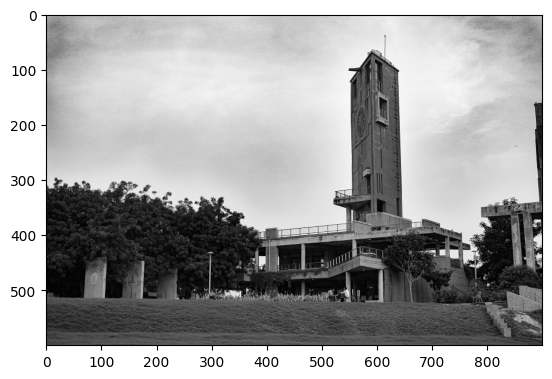

In [7]:
plt.imshow(img, cmap='gray')

In [8]:
print(img)

tensor([[184.0000, 183.0000, 174.6667,  ..., 182.0000, 186.0000, 181.0000],
        [175.0000, 184.0000, 177.0000,  ..., 187.0000, 182.0000, 182.0000],
        [182.6667, 180.6667, 175.3333,  ..., 186.3333, 175.3333, 179.3333],
        ...,
        [ 76.6667,  84.6667,  74.6667,  ...,  66.3333,  62.3333,  54.3333],
        [ 50.3333,  50.3333,  57.0000,  ...,  67.0000,  64.0000,  61.0000],
        [ 60.3333,  66.3333,  75.0000,  ...,  63.0000,  60.0000,  63.0000]])


tensor([[0.7216, 0.7176, 0.6850,  ..., 0.7137, 0.7294, 0.7098],
        [0.6863, 0.7216, 0.6941,  ..., 0.7333, 0.7137, 0.7137],
        [0.7163, 0.7085, 0.6876,  ..., 0.7307, 0.6876, 0.7033],
        ...,
        [0.3007, 0.3320, 0.2928,  ..., 0.2601, 0.2444, 0.2131],
        [0.1974, 0.1974, 0.2235,  ..., 0.2627, 0.2510, 0.2392],
        [0.2366, 0.2601, 0.2941,  ..., 0.2471, 0.2353, 0.2471]])


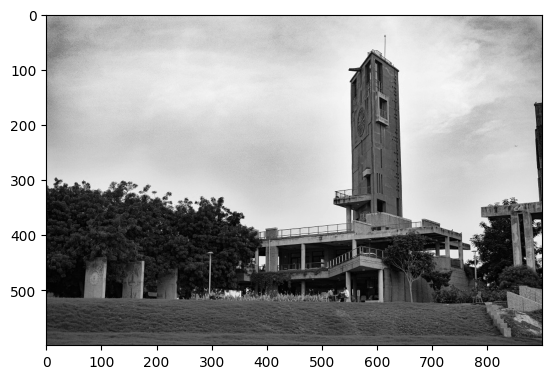

In [9]:
img_normalized = (img - img.min()) / (img.max() - img.min())
print(img_normalized)
plt.imshow(img_normalized,cmap='gray')

In [10]:
# mask image with nan values
def mask_image(img, frac):
    img_copy = img.clone()
    mask = torch.rand(img.shape) < frac
    img_copy[mask] = float('nan')
    return img_copy, mask

In [11]:
masked_img = mask_image(img_normalized, 0.3) # changed img to img_normalized
print("Number of nan values:",masked_img[1].sum())

Number of nan values: tensor(162279)


In [12]:
print(masked_img[0])

tensor([[   nan,    nan, 0.6850,  ...,    nan, 0.7294, 0.7098],
        [0.6863, 0.7216,    nan,  ...,    nan,    nan,    nan],
        [   nan, 0.7085, 0.6876,  ..., 0.7307, 0.6876, 0.7033],
        ...,
        [   nan,    nan,    nan,  ...,    nan, 0.2444, 0.2131],
        [0.1974,    nan,    nan,  ..., 0.2627, 0.2510,    nan],
        [0.2366,    nan,    nan,  ..., 0.2471, 0.2353,    nan]])


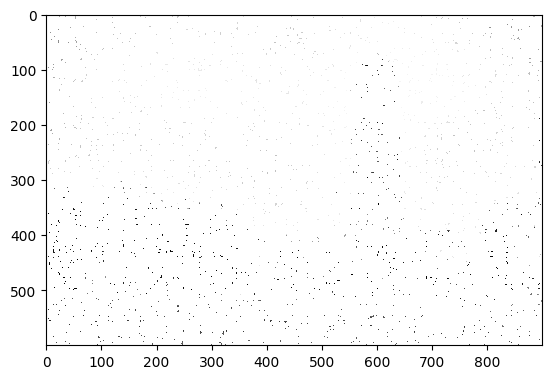

In [13]:
plt.imshow(masked_img[0], cmap='gray')

In [53]:
W, H, loss = matrix_factorize(masked_img[0], 75)

0 loss: tensor(5365.9165, grad_fn=<LinalgVectorNormBackward0>)
100 loss: tensor(630.1844, grad_fn=<LinalgVectorNormBackward0>)
200 loss: tensor(60.5639, grad_fn=<LinalgVectorNormBackward0>)
300 loss: tensor(50.1572, grad_fn=<LinalgVectorNormBackward0>)
400 loss: tensor(46.4703, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(44.0626, grad_fn=<LinalgVectorNormBackward0>)
600 loss: tensor(42.1449, grad_fn=<LinalgVectorNormBackward0>)
700 loss: tensor(40.5612, grad_fn=<LinalgVectorNormBackward0>)
800 loss: tensor(39.3834, grad_fn=<LinalgVectorNormBackward0>)
900 loss: tensor(38.5159, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(37.7227, grad_fn=<LinalgVectorNormBackward0>)
1100 loss: tensor(36.9944, grad_fn=<LinalgVectorNormBackward0>)
1200 loss: tensor(36.3998, grad_fn=<LinalgVectorNormBackward0>)
1300 loss: tensor(35.8494, grad_fn=<LinalgVectorNormBackward0>)
1400 loss: tensor(35.3514, grad_fn=<LinalgVectorNormBackward0>)
1500 loss: tensor(34.8698, grad_fn=<LinalgVectorN

In [54]:
print(loss)

tensor(29.7891, grad_fn=<LinalgVectorNormBackward0>)


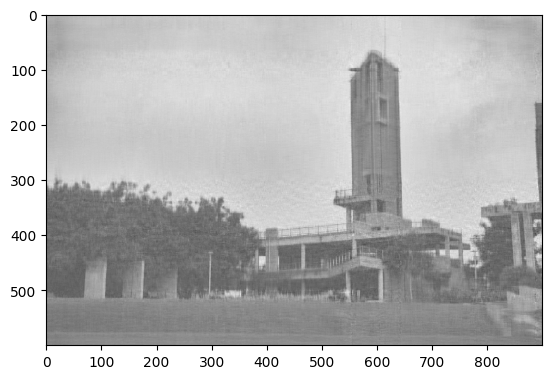

In [55]:
reconstructed_img = torch.mm(W, H).cpu().detach().numpy()
plt.imshow(reconstructed_img, cmap='gray')

max pixel value: 1.2191805 and min pixel value: -0.7516907


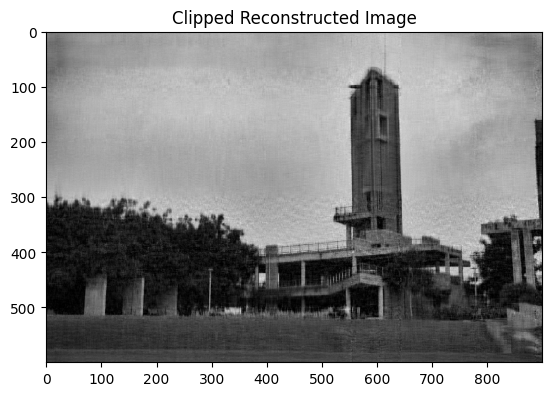

max pixel value in normalized array: 1.0 and min pixel value in normalized array: 0.0


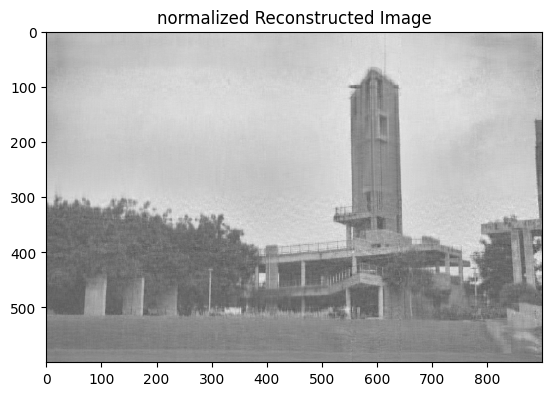

In [56]:
print("max pixel value:",reconstructed_img.max(),"and min pixel value:",reconstructed_img.min())

#Clipped Image
reconstructed_img_clipped = np.clip(reconstructed_img, 0, 255)
plt.title("Clipped Reconstructed Image")
plt.imshow(reconstructed_img_clipped, cmap='gray')
plt.show()

#Standardized Image
reconstructed_img_normalized =  (reconstructed_img - reconstructed_img.min()) / (reconstructed_img.max() - reconstructed_img.min())
print("max pixel value in normalized array:",reconstructed_img_normalized.max(),"and min pixel value in normalized array:",reconstructed_img_normalized.min())
plt.title("normalized Reconstructed Image")
plt.imshow(reconstructed_img_normalized, cmap='gray')
plt.show()


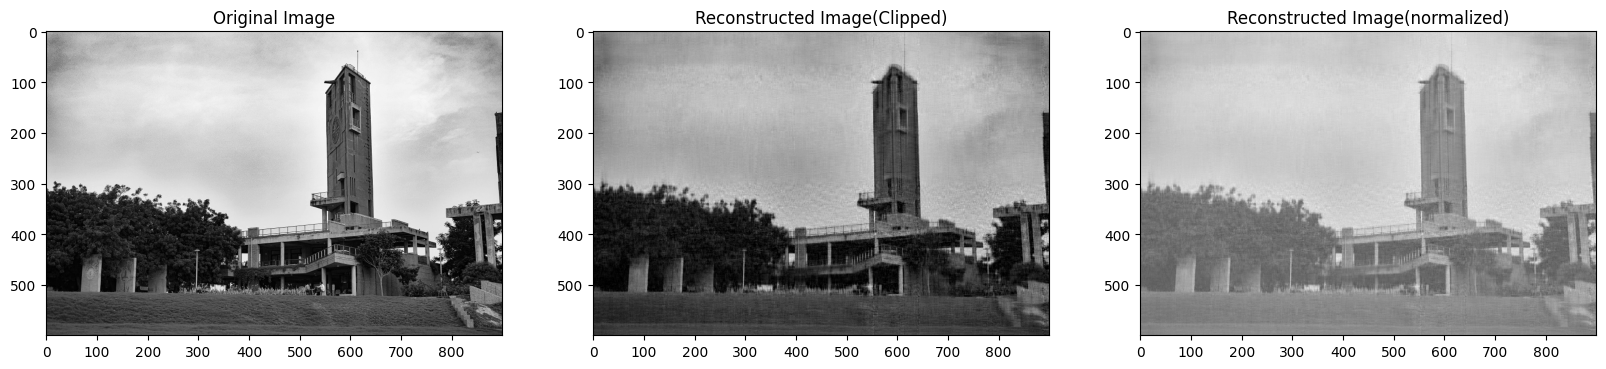

In [57]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.imshow(img_normalized, cmap='gray')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(reconstructed_img_clipped, cmap='gray')
plt.title("Reconstructed Image(Clipped)")

plt.subplot(1,3,3)
plt.imshow(reconstructed_img_normalized, cmap='gray')
plt.title("Reconstructed Image(normalized)")

plt.show()

In [58]:
def rmse(y,y_hat):
    rmse = np.sqrt(np.mean((y - y_hat) ** 2))
    return rmse

def psnr(y,y_hat):
    rmse_value = rmse(y,y_hat)
    if rmse==0:
        psnr == np.inf
    else:
        psnr = 20 * np.log10(250/rmse_value)
    return psnr

In [59]:
## Calculate RMSE and PSNR on clipped array or standardized array with original array
# img_normalized = img_normalized.cpu().detach().numpy()
# reconstructed_img_clipped = reconstructed_img_clipped.cpu().detach().numpy()
# reconstructed_img_normalized = reconstructed_img_normalized.cpu().detach().numpy()
print("RMSE for original image and reconstructed image(Clipped):",rmse(img_normalized,reconstructed_img_clipped))
print("RMSE for original image and reconstructed image(Normalized):",rmse(img_normalized,reconstructed_img_normalized))
print("PSNR for original image and reconstructed image(Clipped):",psnr(img_normalized,reconstructed_img_clipped))
print("PSNR for original image and reconstructed image(Normalized):",psnr(img_normalized,reconstructed_img_normalized))

RMSE for original image and reconstructed image(Clipped): 0.05700354
RMSE for original image and reconstructed image(Normalized): 0.1940628
PSNR for original image and reconstructed image(Clipped): 72.84076378118421
PSNR for original image and reconstructed image(Normalized): 62.19995434397637
